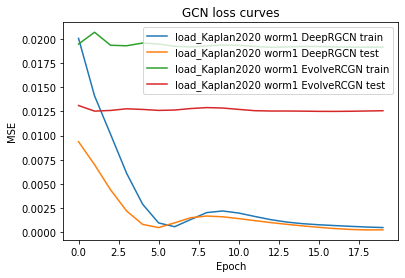

In [7]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Get a list of all log csv files in the "logs" directory
log_dir = "../logs"
csv_files = [f for f in os.listdir(log_dir) if f.endswith("log.csv")]

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over the csv files and plot each one on the same axis
for csv_file in csv_files:
    # Use the filename to determine the dataset, worm, and model name
    filename_parts = csv_file.split(".")
    dataset = filename_parts[0]
    worm = filename_parts[1]
    model_name = filename_parts[2]

    data = pd.read_csv(os.path.join(log_dir, csv_file))
    if "train_losses" in data.columns and "test_losses" in data.columns:
        ax.plot(data["epochs"], data["train_losses"], label=f"{dataset} {worm} {model_name} train")
        ax.plot(data["epochs"], data["test_losses"], label=f"{dataset} {worm} {model_name} test")

# Set the axis labels and title, and show the legend
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")
ax.set_title("GCN loss curves")
ax.legend()

# Show the plot
plt.show()
